In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

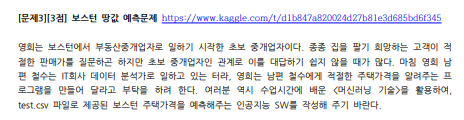

In [31]:
train = pd.read_csv('train.csv')

In [32]:
X_data = train.drop(['index', 'price'], axis=1)
y_target = train['price']

#5.6 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷#


회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다. 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 한다.  
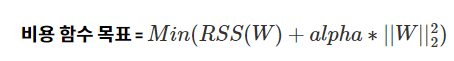  
α : 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 파라미터<br/>α값을 크게하면 W 값을 작게 해 과적합을 개선할 수 있으며 α값을 작게 하면 W 값이 커져도 상쇄가 가능해 데이터 적합을 개선할 수 있다.

##릿지 회귀##
W의 제곱에 페널티를 부여하는 L2 규제 사용



In [33]:
#alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

In [34]:
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-16.98  -29.521 -20.761 -32.924 -23.923]
 5 folds 의 개별 RMSE scores :  [4.121 5.433 4.556 5.738 4.891]
 5 folds 의 평균 RMSE : 4.948


In [35]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 RMSE를 구함
for alpha in alphas:
  ridge = Ridge(alpha=alpha)

  # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 4.855
alpha 0.1 일 때 5 folds 의 평균 RMSE : 4.855
alpha 1 일 때 5 folds 의 평균 RMSE : 4.884
alpha 10 일 때 5 folds 의 평균 RMSE : 4.948
alpha 100 일 때 5 folds 의 평균 RMSE : 5.037


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

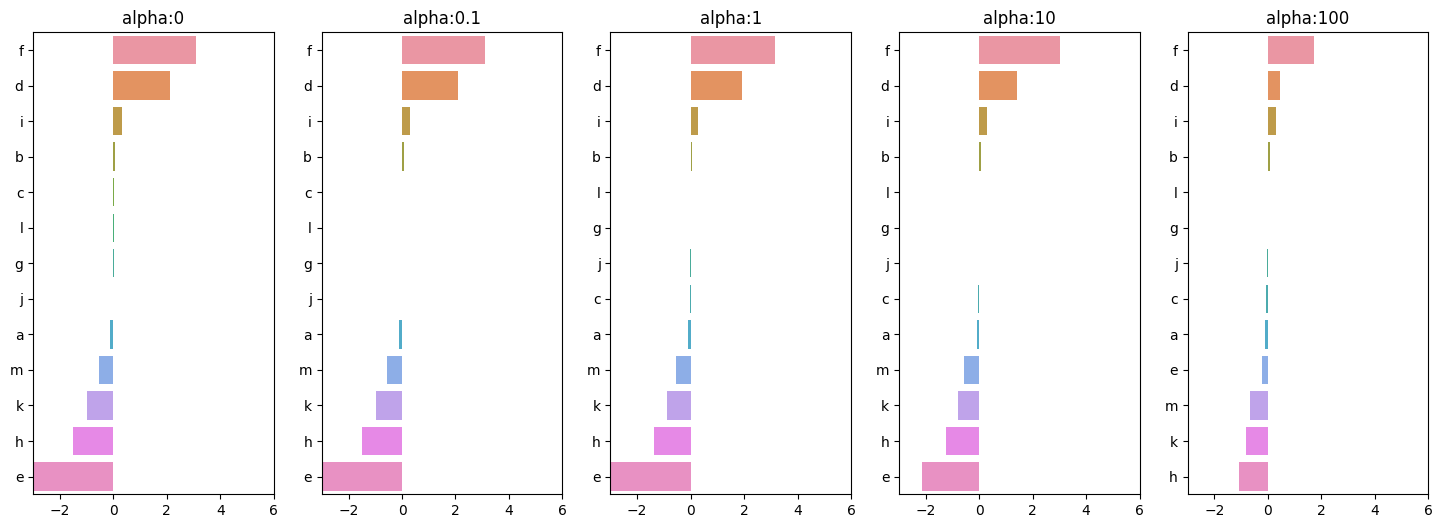

In [37]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장
# pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)
  # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname='alpha:'+str(alpha)
  coeff_df[colname] = coeff
  # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화
  # 회귀 계수 값은 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피쳐벌 회수 계수를 DataFrame으로 표시
plt.show()

In [38]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
f,3.095462,3.108956,3.163978,3.009943,1.735019
d,2.129978,2.101746,1.937648,1.400801,0.445025
i,0.305359,0.302002,0.285799,0.274786,0.303563
b,0.058059,0.058149,0.058654,0.060225,0.063814
c,0.018359,0.011870,-0.020361,-0.057969,-0.065337
l,0.007321,0.007397,0.007774,0.008163,0.007720
g,0.004453,0.003233,-0.002716,-0.007638,0.004517
j,-0.011123,-0.011260,-0.011965,-0.013137,-0.014499
a,-0.112387,-0.111544,-0.107392,-0.103009,-0.101113
m,-0.544645,-0.546315,-0.555527,-0.582408,-0.674155


##라쏘 회귀##
W의 절댓값에 대해 페널티를 부여하는 L1 규제 사용<br/>
L1 규제는 불필요한 회귀 계수를 0으로 만들고 제거<br/>
적절한 피쳐만 회귀에 포함시키는 피처 선택의 특성






In [39]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval


In [40]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 4.974 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.971 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.047 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.336 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.820 


In [41]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
f,3.101496,3.010457,1.735643,0.127143,0.000000
d,0.874714,0.456495,0.000000,0.000000,0.000000
i,0.266485,0.269860,0.263532,0.250091,0.000000
b,0.059437,0.059587,0.059024,0.058174,0.042303
l,0.008349,0.008351,0.007631,0.006636,0.005258
e,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
g,-0.008358,-0.006674,0.007133,0.024770,0.036396
j,-0.013413,-0.013644,-0.013677,-0.013397,-0.004988
c,-0.058027,-0.053394,-0.029334,-0.003809,-0.000000
a,-0.100316,-0.100047,-0.085029,-0.064860,-0.000000


##엘라스틱넷 회귀##
L1 규제와 L2 규제를 결합한 회귀<br/>
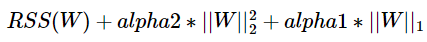<br/>
라쏘 회귀처럼 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피쳐들은 모두 회귀 계수를 0으로 만드는 성향이 강함<br/>
이로 인해 α값에 따라 회귀 계수의 값이 급격히 변동할 수도 있는데 이를 완화하기 위해 L2규제를 추가함<br/>
규제가 결합되 수행 시간이 오래 걸림



In [42]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 4.967 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.971 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.069 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.237 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.688 


In [43]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
f,2.927595,2.783837,1.429864,0.559454,0.000000
d,0.914797,0.629943,0.000000,0.000000,0.000000
i,0.272774,0.275797,0.281677,0.261245,0.097371
b,0.060296,0.060709,0.061366,0.058983,0.042837
l,0.008249,0.008227,0.007515,0.006900,0.005797
g,-0.007019,-0.005486,0.009448,0.021371,0.038835
j,-0.013508,-0.013745,-0.014150,-0.013684,-0.008118
c,-0.059486,-0.058774,-0.041214,-0.018839,-0.000000
a,-0.101093,-0.100537,-0.089462,-0.074537,-0.025640
e,-0.399999,-0.000000,-0.000000,-0.000000,-0.000000


##선형 회귀 모델을 위한 데이터 변환##


(404,)


(array([ 16.,  42.,  66., 123.,  67.,  34.,  28.,   6.,   7.,  15.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

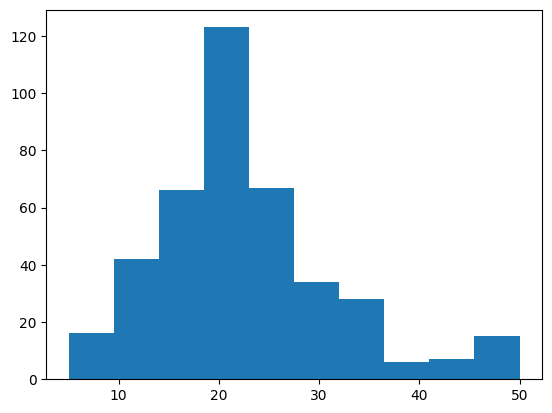

In [44]:
print(y_target.shape)
plt.hist(y_target, bins=10)

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [46]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.855 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.884 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 4.948 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.037 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.855 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.854 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 4.861 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.064 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.278 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 3.940 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 3.609 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 3.941 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.853 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.883 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.575 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.273 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 3.673 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 3.994 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 4.807 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.232 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴

#5.7 로지스틱 회귀#
시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다.<br/>
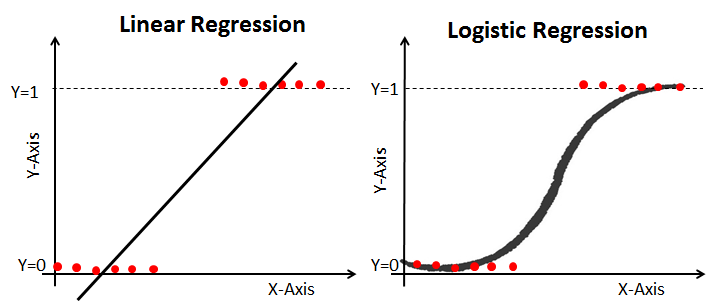<br/>
선형 회귀를 적용하면 정확도가 떨어지는 분류를 조금 더 정확하게 분류할 수 있다.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds), roc_auc_score(y_test , lr_preds)))

accuracy: 0.977, roc_auc:0.972


sag : 확률적경사하강법을 기반으로 하는 대용량 데이터에 적합한 알고리즘, L1 제약조건 지원<br/>
saga : 확률적경사하강법을 기반으로 하는 대용량 데이터에 적합한 알고리즘, L1, L2 제약조건 지원<br/>
liblinear : L1, L2 제약조건 지원, 작은 데이터에 적합한 알고리즘<br/>
newton-cg : 멀티클래스 분류 모델에 씀, L2 제약조건 지원<br/>
lbfgs : 멀티클래스 분류 모델에 씀, 가장 성능이 좋다고 알려져 있음, L2 제약조건 지원<br/>
<br/>
<br/>
max_iter : solver로 지정된 최적화 알고리즘이 최적 수렴할 수 있는 최대 반복 회수


In [50]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test , lr_preds)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.972
solver:liblinear, accuracy: 0.982, roc_auc:0.979
solver:newton-cg, accuracy: 0.977, roc_auc:0.972
solver:sag, accuracy: 0.982, roc_auc:0.979
solver:saga, accuracy: 0.982, roc_auc:0.979


C : cost function, L1 혹은 L2 제약조건의 강도를 설정<br/>
높게 설정할수록 낮은 강도의 제약조건 설정



In [51]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 ) # 정확도로 성능 평가, 3개로 분할할
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


#회귀 트리#
회귀 계수의 결합이 비선형<br/>
리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-10.35 -12.46  -9.31 -11.05  -9.84]
 5 교차 검증의 개별 RMSE scores :  [3.22 3.53 3.05 3.32 3.14]
 5 교차 검증의 평균 RMSE : 3.252 


In [53]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값<br/>
max_dept : 결정 트리의 최대 깊이<br/>
n_estimators : 랜덤 포레스트를 구성하는 결정 트리의 개수<br/>




In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 3.870 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 3.252 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 3.244 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 3.611 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 3.318 


<Axes: >

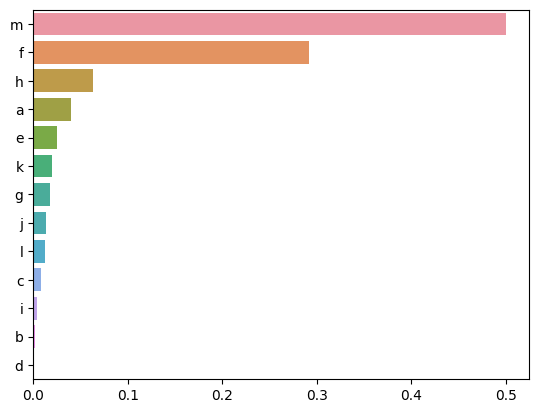

In [55]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


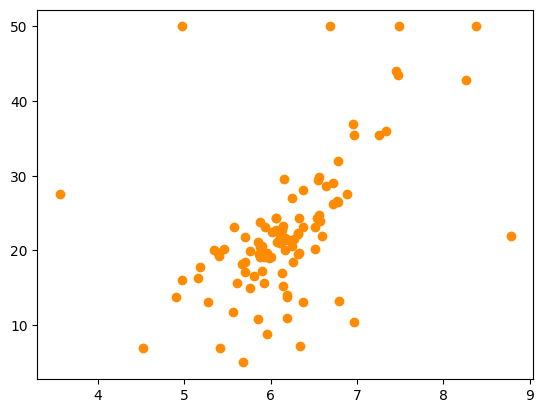

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

X_data_sample = train[['f','price']]
X_data_sample = X_data_sample.sample(n=100,random_state=0)
print(X_data_sample.shape)
plt.figure()
plt.scatter(X_data_sample.f , X_data_sample.price, c="darkorange")

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = X_data_sample['f'].values.reshape(-1,1)
y_target = X_data_sample['price'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


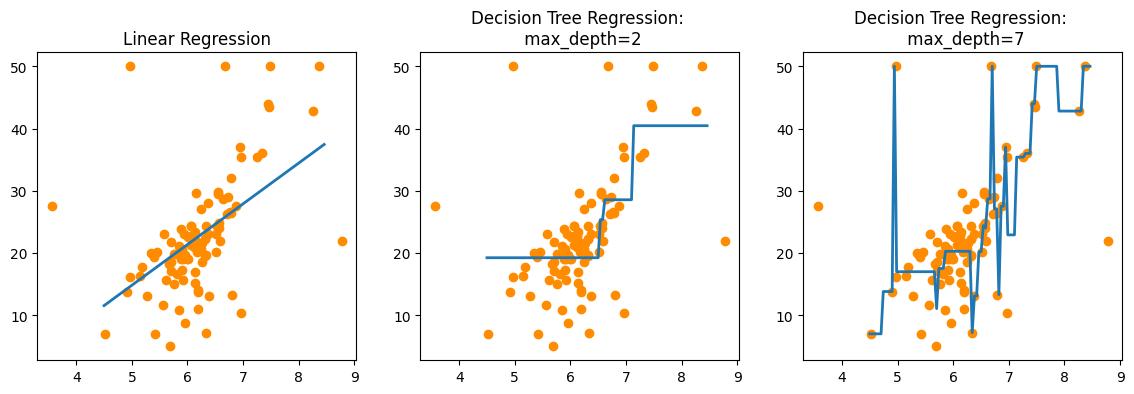

In [58]:
Nfig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(X_data_sample.f, X_data_sample.price, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(X_data_sample.f, X_data_sample.price, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(X_data_sample.f, X_data_sample.price, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)